In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("../data/data_processed/job_postings.csv", low_memory=False)
df_salary = df[df["min_salary"].notna() | df["max_salary"].notna()].copy()

df_salary["posted_date"] = pd.to_datetime(df_salary["posted_date"])
df_salary["year"] = df_salary["posted_date"].dt.year

df_salary = df_salary[df_salary["year"].isin([2023, 2024, 2025])]

df_salary.head()

,job_id,company_id,location_id,posted_date,min_salary,max_salary,currency,required_exp_years,education_level,employment_type,job_description,remote_option,year
10,11,7,8,2025-12-09,202800.0,239200.0,EUR,NaN,Master,Full-time,IVM spezialisiert sich seit 40 Jahren auf die ...,NaN,2025.0
12,13,8,9,2025-11-25,50000.0,85000.0,EUR,NaN,Bachelor,Part-time,Data Engineer 80-100 % * Standort: Bregenz * A...,NaN,2025.0
34,35,8,9,2025-11-25,50000.0,85000.0,EUR,NaN,Bachelor,Part-time,Data Analyst:in 80-100% * Standort: Bregenz * ...,NaN,2025.0
37,38,23,4,2025-12-05,93300.0,93300.0,EUR,NaN,NaN,Full-time,Surveillance Data Processing Engineer (m/w/d) ...,NaN,2025.0
68,69,49,4,2025-07-22,114400.0,135200.0,NaN,NaN,Bachelor,Full-time,"We’re looking for a curious, data-savvy Techni...",Remote,2025.0


In [36]:
df_remote_options = df[df["remote_option"].notna()].copy

df_remote_options()

,job_id,company_id,location_id,posted_date,min_salary,max_salary,currency,required_exp_years,education_level,employment_type,job_description,remote_option
68,69,49,4,2025-07-22,114400.0,135200.0,NaN,NaN,Bachelor,Full-time,"We’re looking for a curious, data-savvy Techni...",Remote
72,73,51,2,2025-09-30,NaN,NaN,NaN,8.0,Master,Full-time,"Job Title: Q&A Manager Base Location: Munich, ...",Remote
81,82,57,4,2025-11-13,NaN,NaN,NaN,NaN,Bachelor,Full-time,Datenanalystin/Datenanalyst - Aufsichtsrechtli...,Remote
83,84,49,4,2025-12-02,NaN,NaN,NaN,NaN,Bachelor,Full-time,We are looking for a creative and forward-thin...,Remote
102,103,51,2,2025-09-30,NaN,NaN,NaN,8.0,Master,Full-time,Job Title: Output Management Architect Base Lo...,Remote
...,...,...,...,...,...,...,...,...,...,...,...,...
1101522,1101523,154142,4823,NaN,61111.0,79443.0,NaN,NaN,NaN,Part-time,THIS IS A NATIONAL GUARD TITLE 32 EXCEPTED SER...,Onsite
1101523,1101524,28464,5353,NaN,62469.0,81206.0,NaN,NaN,Master,NaN,This is the advanced level of the position. Th...,Onsite
1101524,1101525,154176,5248,NaN,52205.0,67865.0,NaN,NaN,Master,Temporary,"Click on ""Learn more about this agency"" button...",Onsite
1101525,1101526,20816,4971,NaN,61111.0,79443.0,NaN,NaN,NaN,Internship,"Click on ""Learn more about this agency"" button...",Onsite


In [ ]:
df_salary["min_salary"].dtype
df_salary["min_salary"].isna().mean()

Index(['job_id', 'company_id', 'location_id', 'posted_date', 'min_salary',
       'max_salary', 'currency', 'required_exp_years', 'education_level',
       'employment_type', 'job_description', 'remote_option'],
      dtype='object')

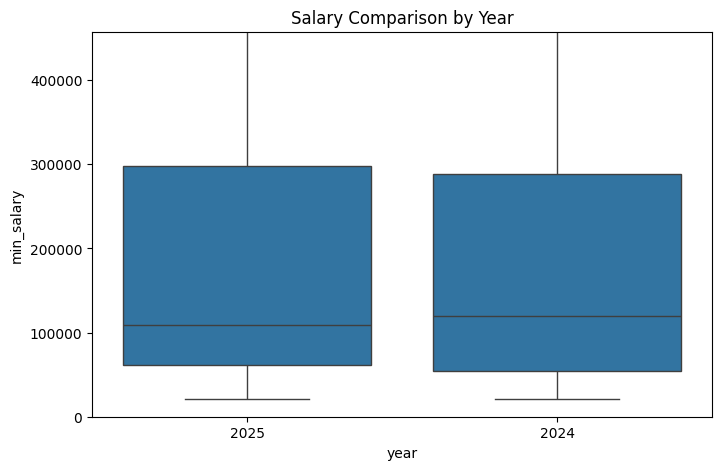

In [52]:
# đảm bảo posted_date là datetime
df_salary["posted_date"] = pd.to_datetime(
    df_salary["posted_date"], errors="coerce"
)

# tạo year
df_salary["year"] = df_salary["posted_date"].dt.year

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_salary,
    x=df_salary["year"].astype(str),
    y="min_salary"
)
plt.ylim(0, df_salary["min_salary"].quantile(0.95))
plt.title("Salary Comparison by Year")
plt.show()

